In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,roc_auc_score
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [11]:
df = pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/dataset1/master/mushrooms.csv") 
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [12]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [14]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [15]:
print("Dataset shape:", df.shape)


Dataset shape: (8124, 23)


In [16]:
df['class'].unique() 

array(['p', 'e'], dtype=object)

In [17]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

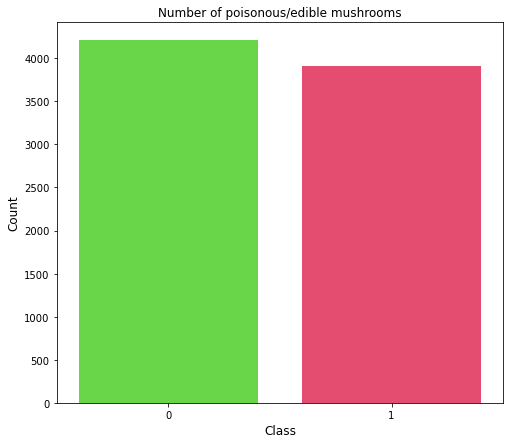

In [38]:
count = df['class'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(count.index, count.values, alpha=0.8, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.title('Number of poisonous/edible mushrooms')
#plt.savefig("mushrooms1.png", format='png', dpi=500)
plt.show()

In [19]:
df = df.astype('category')
df.dtypes


class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

In [50]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [51]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


## Labelencoder

In [54]:
df1=labelencoder.fit_transform(df['class'])
pd.Series(df1)

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Length: 8124, dtype: int64

In [56]:
df["class"]=df1

In [57]:
df1=labelencoder.fit_transform(df['cap-shape'])
pd.Series(df1)
df["cap-shape"]=df1

In [60]:
df1=labelencoder.fit_transform(df['cap-surface'])
pd.Series(df1)
df["cap-surface"]=df1

In [59]:
df1=labelencoder.fit_transform(df['cap-color'])
pd.Series(df1)
df["cap-color"]=df1

In [61]:
df1=labelencoder.fit_transform(df['bruises'])
pd.Series(df1)
df["bruises"]=df1

In [62]:
df1=labelencoder.fit_transform(df['odor'])
pd.Series(df1)
df["odor"]=df1

In [63]:
df1=labelencoder.fit_transform(df['gill-attachment'])
pd.Series(df1)
df["gill-attachment"]=df1

In [64]:
df1=labelencoder.fit_transform(df['gill-attachment'])
pd.Series(df1)
df["gill-attachment"]=df1

In [65]:
df1=labelencoder.fit_transform(df['gill-size'])
pd.Series(df1)
df["gill-size"]=df1

In [66]:
df1=labelencoder.fit_transform(df['gill-color'])
pd.Series(df1)
df["gill-color"]=df1

In [67]:
df1=labelencoder.fit_transform(df['stalk-shape'])
pd.Series(df1)
df["stalk-shape"]=df1

In [68]:
df1=labelencoder.fit_transform(df['stalk-root'])
pd.Series(df1)
df["stalk-root"]=df1

In [69]:
df1=labelencoder.fit_transform(df['stalk-surface-above-ring'])
pd.Series(df1)
df["stalk-surface-above-ring"]=df1

In [70]:
df1=labelencoder.fit_transform(df['stalk-surface-below-ring'])
pd.Series(df1)
df["stalk-surface-below-ring"]=df1

In [71]:
df1=labelencoder.fit_transform(df['stalk-color-above-ring'])
pd.Series(df1)
df["stalk-color-above-ring"]=df1

In [72]:
df1=labelencoder.fit_transform(df['stalk-color-below-ring'])
pd.Series(df1)
df["stalk-color-below-ring"]=df1

In [74]:
df1=labelencoder.fit_transform(df['veil-color'])
pd.Series(df1)
df["veil-color"]=df1

In [75]:
df1=labelencoder.fit_transform(df['ring-number'])
pd.Series(df1)
df["ring-number"]=df1

In [76]:
df1=labelencoder.fit_transform(df['ring-type'])
pd.Series(df1)
df["ring-type"]=df1

In [77]:
df1=labelencoder.fit_transform(df['spore-print-color'])
pd.Series(df1)
df["spore-print-color"]=df1

In [78]:
df1=labelencoder.fit_transform(df['population'])
pd.Series(df1)
df["population"]=df1

In [79]:
df1=labelencoder.fit_transform(df['habitat'])
pd.Series(df1)
df["habitat"]=df1

In [81]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,2,5,5,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,2,5,5,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,2,1,7,7,2,1,0,7,4,2


In [82]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [83]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.575086,1.603644,5.816347,5.794682,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.621459,0.675974,1.901747,1.907291,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,1.000000,6.000000,6.000000,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,3.000000,8.000000,8.000000,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int64
 1   cap-shape                 8124 non-null   int64
 2   cap-surface               8124 non-null   int64
 3   cap-color                 8124 non-null   int64
 4   bruises                   8124 non-null   int64
 5   odor                      8124 non-null   int64
 6   gill-attachment           8124 non-null   int64
 7   gill-spacing              8124 non-null   int64
 8   gill-size                 8124 non-null   int64
 9   gill-color                8124 non-null   int64
 10  stalk-shape               8124 non-null   int64
 11  stalk-root                8124 non-null   int64
 12  stalk-surface-above-ring  8124 non-null   int64
 13  stalk-surface-below-ring  8124 non-null   int64
 14  stalk-color-above-ring    8124 non-null 

In [87]:
df_corr=df.corr().abs()

df_corr

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,0.031384,0.501530,0.093552,0.129200,0.348387,0.540024,0.530566,...,0.334593,0.298801,0.154003,0.146730,0.145142,0.214366,0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,0.050454,0.048203,0.035374,0.021935,0.078865,0.013196,0.054050,0.006039,...,0.030417,0.032591,0.031659,0.030390,0.072560,0.106534,0.025457,0.073416,0.063413,0.042221
cap-surface,0.178446,0.050454,1.000000,0.019402,0.070228,0.045233,0.034180,0.282306,0.208100,0.161017,...,0.089090,0.107965,0.066050,0.068885,0.016603,0.026147,0.106407,0.230364,0.021555,0.163887
cap-color,0.031384,0.048203,0.019402,1.000000,0.000764,0.387121,0.041436,0.144259,0.169464,0.084659,...,0.060837,0.047710,0.002364,0.008057,0.036130,0.005822,0.162513,0.293523,0.144770,0.033925
bruises,0.501530,0.035374,0.070228,0.000764,1.000000,0.061825,0.137359,0.299473,0.369596,0.527120,...,0.460824,0.458983,0.083538,0.092874,0.119770,0.056788,0.692973,0.285008,0.088137,0.075095
odor,0.093552,0.021935,0.045233,0.387121,0.061825,1.000000,0.059590,0.063936,0.310495,0.129213,...,0.118617,0.061820,0.174532,0.169407,0.057747,0.111905,0.281387,0.469055,0.043623,0.026610
gill-attachment,0.129200,0.078865,0.034180,0.041436,0.137359,0.059590,1.000000,0.071489,0.108984,0.128567,...,0.088916,0.116177,0.099299,0.097160,0.897518,0.093236,0.146689,0.029524,0.165575,0.030304
gill-spacing,0.348387,0.013196,0.282306,0.144259,0.299473,0.063936,0.071489,1.000000,0.108333,0.100193,...,0.212359,0.213775,0.274574,0.253505,0.073363,0.243014,0.195897,0.047323,0.529253,0.154680
gill-size,0.540024,0.054050,0.208100,0.169464,0.369596,0.310495,0.108984,0.108333,1.000000,0.516736,...,0.056310,0.010894,0.296548,0.278708,0.103809,0.171362,0.460872,0.622991,0.147682,0.161418
gill-color,0.530566,0.006039,0.161017,0.084659,0.527120,0.129213,0.128567,0.100193,0.516736,1.000000,...,0.224287,0.257224,0.058299,0.074781,0.097583,0.096054,0.629398,0.416135,0.034090,0.202972


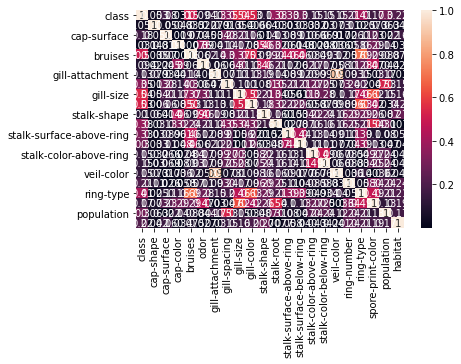

In [88]:
sns.heatmap(df_corr,annot=True)
plt.show()

## Skewness

In [114]:
from scipy.stats import skew # checking for skewness

0.07193224988597952
-0.24700637928120617
-0.5907497451740007
0.7068342913350331
0.3426869271575418
-0.08077478619378756
-5.975972685654995
1.83974847807238
0.8256444104849662
0.061398853411354266
-0.27129511258312494
0.9476773425430853
-1.0985365054493224
-0.7575632718648749
-1.8350954640494637
-1.7912626088095116
-6.945661192077107
2.701158403504732
-0.28996465324345516
0.5483245789238169
-1.4128347513176136
0.9853656933222494


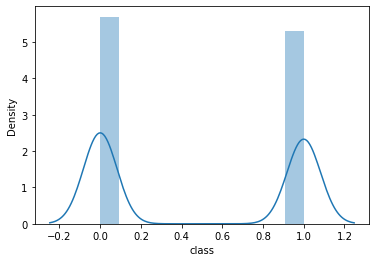

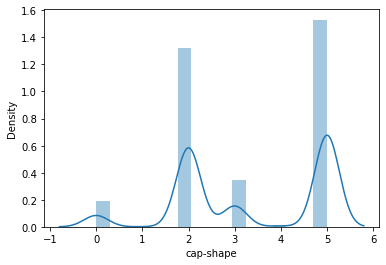

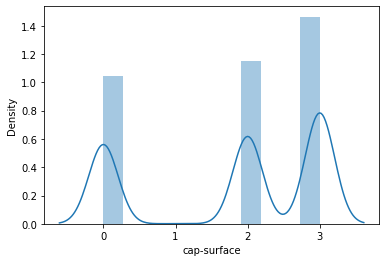

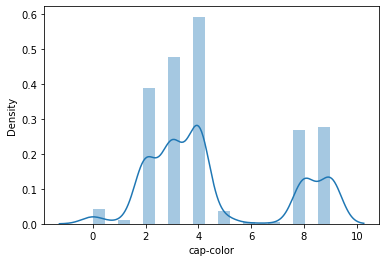

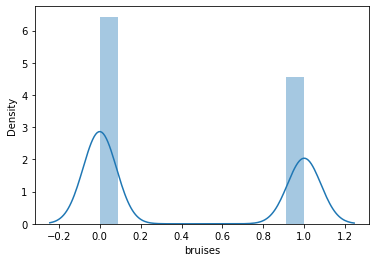

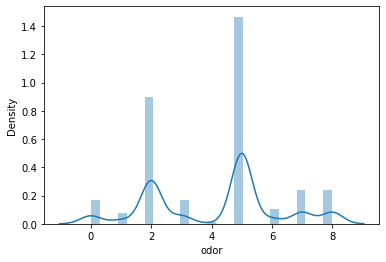

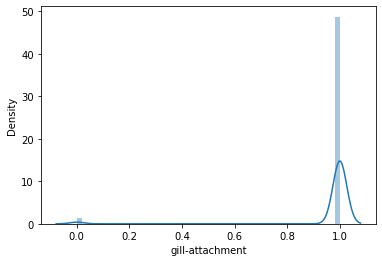

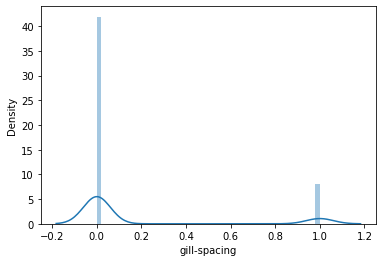

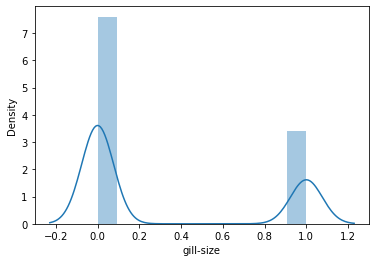

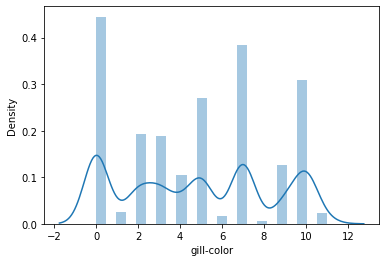

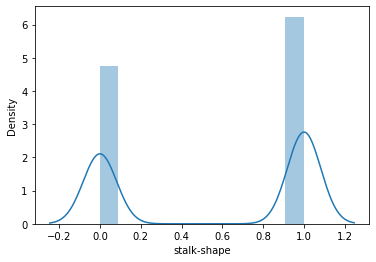

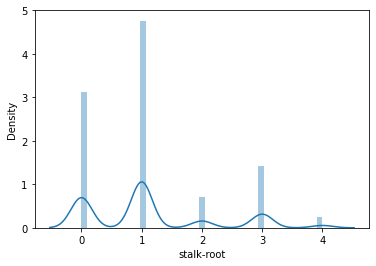

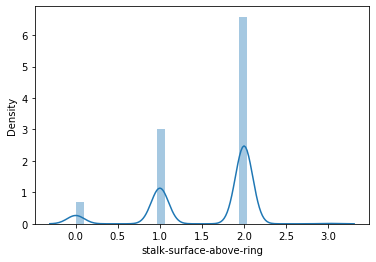

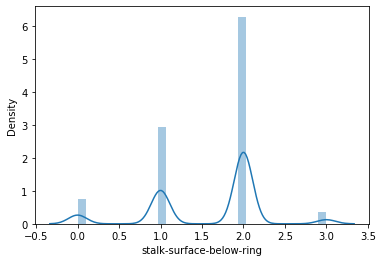

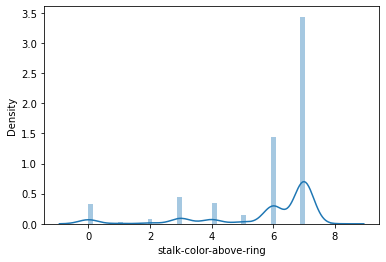

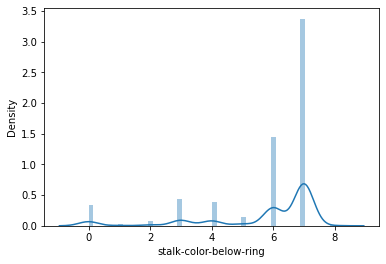

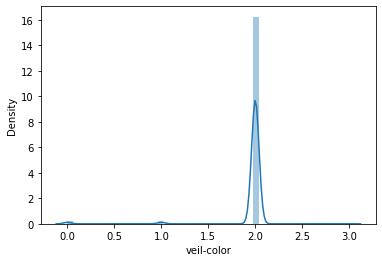

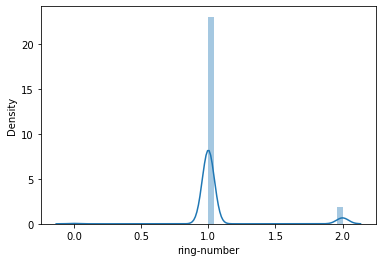

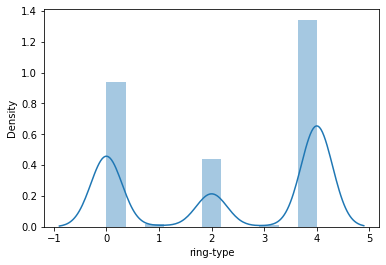

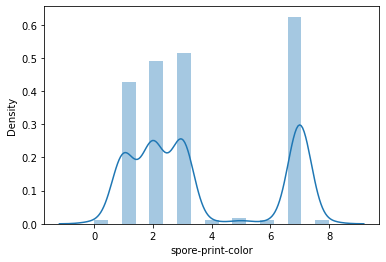

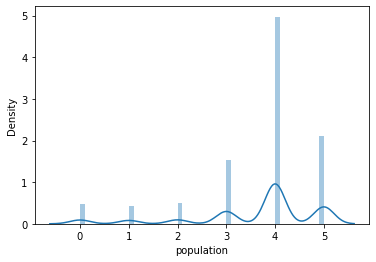

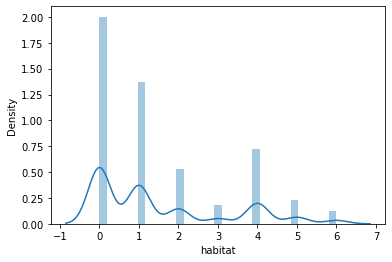

In [90]:
for col in df:
    print(skew(df[col]))
    plt.figure()
    sns.distplot(df[col])
    plt.show

In [91]:
X=df.drop(columns='class')
Y=df["class"]

In [92]:
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)

In [93]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=21)

In [95]:
classification=DecisionTreeClassifier()
classification.fit(X_train,Y_train)

DecisionTreeClassifier()

In [96]:
feature_name=list(X.columns)
class_name=list(Y_train.unique())
feature_name

['cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [97]:
clf.score(X_train,Y_train)
Y_pred=clf.predict(X_test)
clf.score(X_test,Y_test)

1.0

In [99]:
confusion_matrix(Y_test,Y_pred)

array([[1057,    0],
       [   0,  974]], dtype=int64)

In [100]:
grid_param={
    'criterion':['gini','Entropy'],
    'max_depth':(3,12,2),
    'min_samples_leaf':range(3,10,2),
    'min_samples_split':range(4,10,2)
}

In [101]:
grid_search=GridSearchCV(estimator=clf,param_grid=grid_param,cv=5,n_jobs=-1)

In [102]:
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'Entropy'],
                         'max_depth': (3, 12, 2),
                         'min_samples_leaf': range(3, 10, 2),
                         'min_samples_split': range(4, 10, 2)})

## Decision tree classifier

In [112]:
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

## Test accuracy

In [113]:
y_pred_dt = dt.predict(X_test)
print("Decision Tree Classifier report: \n\n", classification_report(Y_test, y_pred_dt))
print("Test Accuracy: {}%".format(round(dt.score(X_test, Y_test)*100, 2)))

Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1057
           1       1.00      1.00      1.00       974

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

Test Accuracy: 100.0%
